In [24]:
import pandas as pd

df = pd.read_csv('MP_queried_data_featurized_w_additional_acr_ae_en.csv')

# Calculate the mean and standard deviation of the formation energy
formation_energy_mean = df['formation_energy_per_atom'].mean()
formation_energy_std = df['formation_energy_per_atom'].std()

# Define the upper and lower bounds
lower_bound = formation_energy_mean - 5 * formation_energy_std
upper_bound = formation_energy_mean + 5 * formation_energy_std

# Remove samples with formation energy outside of ±5σ 
train_data_filtered = df[(df['formation_energy_per_atom'] >= lower_bound) & (df['formation_energy_per_atom'] <= upper_bound)]

train_data_filtered.reset_index(drop=True, inplace=True)

C:\Users\Zyra\AppData\Local\Temp\ipykernel_13480\3665642337.py:3: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MP_queried_data_featurized_w_additional_acr_ae_en.csv')


In [25]:
def classify_stability(e_hull):
    if e_hull <= 0.025:        # stable compounds
        return "Stable"
    elif e_hull <= 0.100:      # experimentally accessible metastable phases
        return "Metastable"
    else:                      # highly unstable
        return "Unstable"

train_data_filtered["stability_label"] = train_data_filtered["energy_above_hull"].apply(classify_stability)

train_data_filtered

C:\Users\Zyra\AppData\Local\Temp\ipykernel_13480\2474391877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_filtered["stability_label"] = train_data_filtered["energy_above_hull"].apply(classify_stability)


,material_id,formula_pretty,crystal_system,symbol,number,point_group,symprec,version,uncorrected_energy_per_atom,energy_per_atom,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
0,mp-573369,Cs3Nd(MoO4)3,Orthorhombic,Pnma,62,mmm,0.1,2.0.2,-6.708421,-7.647894,...,2.698421,3.44,0.79,2.65,107.368421,1.216223,1.916000,0.471626,1.444374,Stable
1,mp-28967,Ba(PdS2)2,Monoclinic,P2_1/m,11,2/m,0.1,2.0.2,-15.913734,-5.242962,...,2.230000,2.58,0.89,1.69,121.142857,1.368148,2.077104,0.144620,1.932484,Stable
2,mp-2712904,Na7Ta3Zn(SiO4)6,Trigonal,P3,143,3,0.1,2.0.2,-7.331154,-7.733301,...,2.600488,3.44,0.93,2.51,93.878049,1.205133,1.461113,0.322000,1.139113,Metastable
3,mp-1042447,TiZnBiO5,Orthorhombic,Pbca,61,mmm,0.1,2.0.2,-6.526640,-6.956015,...,2.786250,3.44,1.54,1.90,90.000000,1.189561,1.461113,0.079000,1.382113,Metastable
4,mp-2715697,Na2YNb3Si4(SO12)2,Triclinic,P1,1,1,0.1,2.0.2,-7.610403,-8.068403,...,2.866667,3.44,0.93,2.51,86.000000,1.359280,2.077104,0.307000,1.770104,Metastable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153160,mp-22426,ScSiNi,Orthorhombic,Pnma,62,mmm,0.1,2.0.2,-11.616847,-6.710994,...,1.723333,1.91,1.36,0.55,124.666667,0.911174,1.389521,0.188000,1.201521,Stable
153161,mp-1210929,MnAg2SnSe4,Orthorhombic,Pmn2_1,31,mm2,0.1,2.0.2,-4.397423,-4.633423,...,2.196250,2.55,1.55,1.00,122.375000,1.685535,2.020670,1.112067,0.908603,Stable
153162,mp-741045,Na4AlP2HO9,Orthorhombic,Pbcm,57,mmm,0.1,2.0.2,-6.254027,-6.617733,...,2.521765,3.44,0.93,2.51,92.176471,1.060116,1.461113,0.432830,1.028283,Stable
153163,mp-1209640,Tm4Ni,Cubic,Fd-3m,227,m-3m,0.1,2.0.2,-4.492395,-4.492395,...,1.382000,1.91,1.25,0.66,153.200000,1.054400,1.156000,1.029000,0.127000,Unstable


In [26]:
columns_to_keep = ['material_id', 'formula_pretty', 'formation_energy_per_atom', 'energy_above_hull', 'crystal_system', 'number', 'symbol', 'point_group',
    'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
    'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
    'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
    'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
    'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
    'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
    'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
    'Es', 'Fm', 'Md', 'No', 'Lr', 'n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
    'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range', 'stability_label'
]

# Keep only these columns
df_filtered = train_data_filtered[columns_to_keep].copy()
df_filtered

,material_id,formula_pretty,formation_energy_per_atom,energy_above_hull,crystal_system,number,symbol,point_group,H,He,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
0,mp-573369,Cs3Nd(MoO4)3,-2.414818,0.000000,Orthorhombic,62,Pnma,mmm,0.000000,0.0,...,2.698421,3.44,0.79,2.65,107.368421,1.216223,1.916000,0.471626,1.444374,Stable
1,mp-28967,Ba(PdS2)2,-1.124079,0.000000,Monoclinic,11,P2_1/m,2/m,0.000000,0.0,...,2.230000,2.58,0.89,1.69,121.142857,1.368148,2.077104,0.144620,1.932484,Stable
2,mp-2712904,Na7Ta3Zn(SiO4)6,-2.912354,0.049678,Trigonal,143,P3,3,0.000000,0.0,...,2.600488,3.44,0.93,2.51,93.878049,1.205133,1.461113,0.322000,1.139113,Metastable
3,mp-1042447,TiZnBiO5,-2.236384,0.077777,Orthorhombic,61,Pbca,mmm,0.000000,0.0,...,2.786250,3.44,1.54,1.90,90.000000,1.189561,1.461113,0.079000,1.382113,Metastable
4,mp-2715697,Na2YNb3Si4(SO12)2,-2.837049,0.079832,Triclinic,1,P1,1,0.000000,0.0,...,2.866667,3.44,0.93,2.51,86.000000,1.359280,2.077104,0.307000,1.770104,Metastable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153160,mp-22426,ScSiNi,-0.865019,0.000000,Orthorhombic,62,Pnma,mmm,0.000000,0.0,...,1.723333,1.91,1.36,0.55,124.666667,0.911174,1.389521,0.188000,1.201521,Stable
153161,mp-1210929,MnAg2SnSe4,-0.528284,0.000000,Orthorhombic,31,Pmn2_1,mm2,0.000000,0.0,...,2.196250,2.55,1.55,1.00,122.375000,1.685535,2.020670,1.112067,0.908603,Stable
153162,mp-741045,Na4AlP2HO9,-2.623089,0.000000,Orthorhombic,57,Pbcm,mmm,0.058824,0.0,...,2.521765,3.44,0.93,2.51,92.176471,1.060116,1.461113,0.432830,1.028283,Stable
153163,mp-1209640,Tm4Ni,0.249634,0.465763,Cubic,227,Fd-3m,m-3m,0.000000,0.0,...,1.382000,1.91,1.25,0.66,153.200000,1.054400,1.156000,1.029000,0.127000,Unstable


In [27]:
df_lowest_energy = df_filtered.sort_values('formation_energy_per_atom').drop_duplicates(subset=['formula_pretty', 'number', 'stability_label'], keep='first')
df_lowest_energy

,material_id,formula_pretty,formation_energy_per_atom,energy_above_hull,crystal_system,number,symbol,point_group,H,He,...,en_mean,en_max,en_min,en_range,avg_covalent_radius,ea_mean,ea_max,ea_min,ea_range,stability_label
102698,mp-1518724,BaGdCrFeO6,-5.150986,0.000000,Cubic,216,F-43m,-43m,0.0,0.0,...,2.6220,3.44,0.89,2.55,98.10,1.080922,1.461113,0.14462,1.316493,Stable
88139,mp-905,LaF3,-4.510049,0.000000,Trigonal,165,P-3c1,-3m,0.0,0.0,...,3.2600,3.98,1.10,2.88,93.00,2.668392,3.401190,0.47000,2.931190,Stable
138384,mp-334,LaF3,-4.509148,0.000901,Hexagonal,185,P6_3cm,6mm,0.0,0.0,...,3.2600,3.98,1.10,2.88,93.00,2.668392,3.401190,0.47000,2.931190,Stable
60831,mp-11347,TbF3,-4.504523,0.000000,Orthorhombic,62,Pnma,mmm,0.0,0.0,...,3.9800,3.98,3.98,0.00,90.00,2.842142,3.401190,1.16500,2.236190,Stable
43647,mp-1212843,DyF3,-4.501402,0.000000,Orthorhombic,62,Pnma,mmm,0.0,0.0,...,3.2900,3.98,1.22,2.76,89.75,2.638892,3.401190,0.35200,3.049190,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106729,mp-1093928,TaMnRe2,4.532568,4.694659,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.7125,1.90,1.50,0.40,131.75,0.207333,0.322000,0.15000,0.172000,Unstable
122454,mp-1097209,VReMo2,4.544091,4.713604,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.9625,2.16,1.63,0.53,135.25,0.542750,0.748000,0.15000,0.598000,Unstable
38685,mp-1097208,Ta2CrMo,4.545443,4.597545,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.7050,2.16,1.50,0.66,138.00,0.514500,0.748000,0.32200,0.426000,Unstable
72913,mp-1097434,Nb2OsW,4.547295,4.757008,Orthorhombic,71,Immm,mmm,0.0,0.0,...,1.7750,2.20,1.60,0.60,140.00,0.937768,1.100000,0.81626,0.283740,Unstable


In [32]:
columns_to_keep = ['formula_pretty', 'formation_energy_per_atom', 'energy_above_hull',
                       'crystal_system', 'number', 'symbol', 'point_group', 'stability_label',
                       'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
                       'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
                       'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
                       'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
                       'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
                       'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
                       'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
                       'Es', 'Fm', 'Md', 'No', 'Lr', 'n_atoms', 'n_elements', 'avg_atomic_mass', 'en_mean', 
                       'en_max', 'en_min', 'en_range', 'avg_covalent_radius', 'ea_mean', 'ea_max', 'ea_min', 'ea_range']

    # Keep only relevant columns
df_filtered = df_lowest_energy[columns_to_keep].copy()

    # Drop rows with missing target values
df_filtered = df_filtered.dropna(subset=['formation_energy_per_atom'])

    # One-hot encode space group number and stability label
df_encoded = pd.get_dummies(df_filtered, columns=["number", "stability_label"], prefix=["sg", "stab"])

    # Identify dummy columns
dummy_cols = [col for col in df_encoded.columns if col.startswith("sg_") or col.startswith("stab_")]

    # Convert dummies to int
df_encoded[dummy_cols] = df_encoded[dummy_cols].astype(int)


In [39]:
X = df_encoded.drop(columns=['formula_pretty', 'formation_energy_per_atom', 'energy_above_hull',
                       'crystal_system', 'symbol', 'point_group'])
y = df_encoded['formation_energy_per_atom']

In [40]:
print("Final shape:", X.shape)
print("Number of NaNs:", X.isna().sum().sum())
print("Target mean:", y.mean(), "std:", y.std())


Final shape: (135820, 346)
Number of NaNs: 0
Target mean: -1.4314034843007815 std: 1.1989085250097682


In [37]:
df_encoded = df_encoded.dropna()


In [41]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# 1️⃣ Device
# =========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================
# 2️⃣ Define your model architecture (must match saved model)
# =========================
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )
    def forward(self, x):
        return self.layers(x)

# =========================
# 3️⃣ Load data (X, y) as torch tensors
# =========================
eps = 1e-8
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.float32).to(device)

# Normalize inputs same as during training
X_tensor = (X_tensor - X_tensor.mean(dim=0)) / (X_tensor.std(dim=0) + eps)
y_mean, y_std = y_tensor.mean(), y_tensor.std()
y_tensor = (y_tensor - y_mean) / (y_std + eps)

# =========================
# 4️⃣ Load saved model
# =========================
model_path = "saved_models/best_model_overall2.pth"
model = NeuralNetwork(X_tensor.shape[1], 1).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
print("✅ Model loaded successfully.")

# =========================
# 5️⃣ Evaluate model
# =========================
with torch.no_grad():
    y_pred = model(X_tensor).cpu().numpy()
    y_true = y_tensor.cpu().numpy()

# Denormalize
y_pred_denorm = y_pred * (y_std.cpu().numpy() + eps) + y_mean.cpu().numpy()
y_true_denorm = y_true * (y_std.cpu().numpy() + eps) + y_mean.cpu().numpy()

# Metrics
mae = mean_absolute_error(y_true_denorm, y_pred_denorm)
mse = mean_squared_error(y_true_denorm, y_pred_denorm)
rmse = np.sqrt(mse)
r2 = r2_score(y_true_denorm, y_pred_denorm)

print("\n=== Model Evaluation Metrics ===")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


✅ Model loaded successfully.

=== Model Evaluation Metrics ===
MAE:  0.0479
MSE:  0.0240
RMSE: 0.1549
R²:   0.9833


In [42]:
import pandas as pd
import numpy as np

# Make a DataFrame with true, predicted, and error
df_errors = pd.DataFrame({
    'y_true': y_true_denorm.flatten(),
    'y_pred': y_pred_denorm.flatten(),
    'error_abs': np.abs(y_true_denorm.flatten() - y_pred_denorm.flatten()),
    'error_signed': y_true_denorm.flatten() - y_pred_denorm.flatten()
})

# Add original features for analysis
df_errors = pd.concat([df_errors, df_filtered.reset_index(drop=True)], axis=1)


In [44]:
print("Error min:", df_errors['error_abs'].min())
print("Error max:", df_errors['error_abs'].max())
print("Error 99th percentile:", np.percentile(df_errors['error_abs'], 99))


Error min: 7.1525574e-07
Error max: 6.861903
Error 99th percentile: nan


In [45]:
print("Number of NaNs in error_abs:", df_errors['error_abs'].isna().sum())


Number of NaNs in error_abs: 749


In [48]:
# Remove NaNs in the error column
df_errors = df_errors.dropna(subset=['error_abs'])

# Now compute 99th percentile
threshold = np.percentile(df_errors['error_abs'], 99)
df_worst = df_errors[df_errors['error_abs'] >= threshold]
print(f"Number of worst predictions: {len(df_worst)}")


Number of worst predictions: 1359


Number of worst predictions: 100

High-error samples per space group:
number
71     36
2      13
139     8
225     7
216     4
65      3
123     3
1       3
140     2
12      2
74      2
106     2
38      2
221     1
166     1
227     1
59      1
93      1
47      1
15      1
136     1
127     1
206     1
62      1
5       1
44      1
Name: count, dtype: int64

High-error samples by stability:
stability_label
Unstable      94
Stable         3
Metastable     3
Name: count, dtype: int64

Frequency of elements in high-error samples:
O     9.172165
N     6.128726
Mg    4.446429
Na    3.664683
Cd    2.950000
        ...   
Es    0.000000
Fm    0.000000
Md    0.000000
No    0.000000
Lr    0.000000
Length: 103, dtype: float64


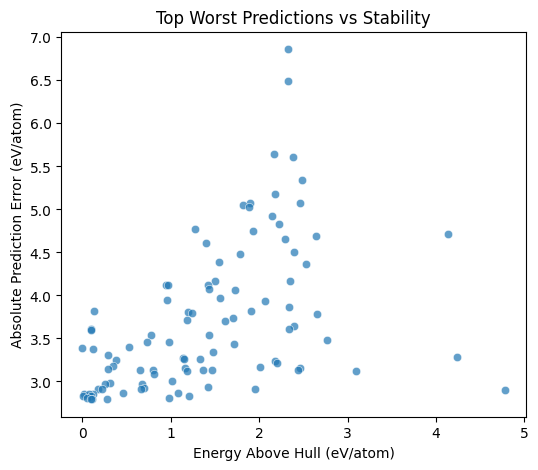


Top 5 worst predictions:
  formula_pretty  number stability_label  error_abs
0             H2     225        Unstable   6.861903
1         CsLaW2     139        Unstable   6.496158
2        MgZrAg2      71        Unstable   5.648966
3         LaYCu2      71        Unstable   5.612028
4        Sc2ZnPd      71        Unstable   5.340686


In [49]:
import pandas as pd
import numpy as np

# ---------------------------
# 1️⃣ Create errors DataFrame
# ---------------------------
df_errors = pd.DataFrame({
    'y_true': y_true_denorm.flatten(),
    'y_pred': y_pred_denorm.flatten(),
})
df_errors['error_abs'] = np.abs(df_errors['y_true'] - df_errors['y_pred'])
df_errors['error_signed'] = df_errors['y_true'] - df_errors['y_pred']

# Add original features
df_errors = pd.concat([df_errors, df_filtered.reset_index(drop=True)], axis=1)

# Drop any rows with NaNs in the error column
df_errors = df_errors.dropna(subset=['error_abs'])

# ---------------------------
# 2️⃣ Select top worst predictions
# ---------------------------
top_n = 100  # adjust as needed
df_worst = df_errors.sort_values(by='error_abs', ascending=False).head(top_n)
print(f"Number of worst predictions: {len(df_worst)}")

# ---------------------------
# 3️⃣ Analyze by Space Group
# ---------------------------
space_group_counts = df_worst['number'].value_counts()
print("\nHigh-error samples per space group:")
print(space_group_counts)

# ---------------------------
# 4️⃣ Analyze by Stability
# ---------------------------
stability_counts = df_worst['stability_label'].value_counts()
print("\nHigh-error samples by stability:")
print(stability_counts)

# ---------------------------
# 5️⃣ Analyze by Elements
# ---------------------------
# Columns representing elements (H, He, Li, ..., Lr)
element_cols = [col for col in df_filtered.columns if col in X.columns and len(col) <= 2]

element_sums = df_worst[element_cols].sum().sort_values(ascending=False)
print("\nFrequency of elements in high-error samples:")
print(element_sums)

# ---------------------------
# 6️⃣ Optional: Visualize errors vs energy above hull
# ---------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(x='energy_above_hull', y='error_abs', data=df_worst, alpha=0.7)
plt.xlabel('Energy Above Hull (eV/atom)')
plt.ylabel('Absolute Prediction Error (eV/atom)')
plt.title('Top Worst Predictions vs Stability')
plt.show()

# ---------------------------
# ✅ df_worst ready for inspection
# ---------------------------
df_worst.reset_index(drop=True, inplace=True)
print("\nTop 5 worst predictions:")
print(df_worst[['formula_pretty','number','stability_label','error_abs']].head())


In [51]:
# 1️⃣ Count occurrences of each space group
sg_counts = df_worst['number'].value_counts()

# 2️⃣ Convert to DataFrame
space_group_summary = sg_counts.reset_index()
space_group_summary.columns = ['space_group', 'count']  # rename columns explicitly

# 3️⃣ Compute percentages
space_group_summary['percentage'] = 100 * space_group_summary['count'] / len(df_worst)

# 4️⃣ Keep top 10 space groups
space_group_summary = space_group_summary.head(10)

print(space_group_summary)


   space_group  count  percentage
0           71    160   11.773363
1            2    137   10.080942
2            1     99    7.284768
3           14     74    5.445180
4          225     70    5.150846
5          221     55    4.047093
6          139     53    3.899926
7          194     51    3.752759
8          216     44    3.237675
9          123     42    3.090508


Number of worst predictions: 100

=== 🔹 Top 10 Space Groups with Highest Errors ===
 space_group  count  percentage
          71     36        36.0
           2     13        13.0
         139      8         8.0
         225      7         7.0
         216      4         4.0
          65      3         3.0
         123      3         3.0
           1      3         3.0
         140      2         2.0
          12      2         2.0

=== 🔹 Stability Distribution Among High-Error Samples ===
stability_label  count  percentage
       Unstable     94        94.0
         Stable      3         3.0
     Metastable      3         3.0

=== 🔹 Frequency of Rare-Earth/f-block Elements in High-Error Samples ===
La    1.083333
Dy    1.000000
Lu    0.301587
Ce    0.250000
Gd    0.200000
Tb    0.100000
Nd    0.076923


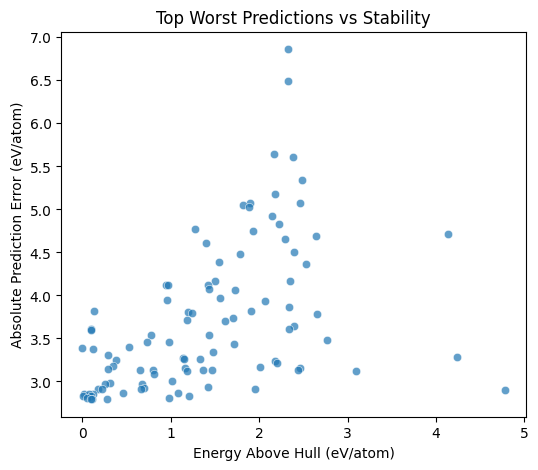


📁 Saved detailed results to 'high_error_samples_analysis.csv'

Top 5 worst predictions:
       formula_pretty  number stability_label  error_abs
135730             H2     225        Unstable   6.861903
135720         CsLaW2     139        Unstable   6.496158
135404        MgZrAg2      71        Unstable   5.648966
135587         LaYCu2      71        Unstable   5.612028
135262        Sc2ZnPd      71        Unstable   5.340686


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# 1️⃣ Compute absolute errors and combine with original data
# ==========================================================
df_errors = pd.DataFrame({
    'y_true': y_true_denorm.flatten(),
    'y_pred': y_pred_denorm.flatten(),
})
df_errors['error_abs'] = np.abs(df_errors['y_true'] - df_errors['y_pred'])
df_errors['error_signed'] = df_errors['y_true'] - df_errors['y_pred']

# Combine with metadata from original dataframe (space group, stability, etc.)
df_errors = pd.concat([df_errors, df_filtered.reset_index(drop=True)], axis=1)

# Drop any rows with NaNs in the error column
df_errors = df_errors.dropna(subset=['error_abs'])

# ==========================================================
# 2️⃣ Select top worst predictions (adjustable)
# ==========================================================
top_n = 100  # Top 100 worst predictions
df_worst = df_errors.sort_values(by='error_abs', ascending=False).head(top_n)
print(f"Number of worst predictions: {len(df_worst)}")

# ==========================================================
# 3️⃣ Analyze by space group
# ==========================================================
sg_counts = df_worst['number'].value_counts()
space_group_summary = sg_counts.reset_index()
space_group_summary.columns = ['space_group', 'count']
space_group_summary['percentage'] = 100 * space_group_summary['count'] / len(df_worst)
space_group_summary = space_group_summary.head(10)  # top 10 space groups

# ==========================================================
# 4️⃣ Analyze by stability label
# ==========================================================
stability_counts = df_worst['stability_label'].value_counts()
stability_summary = stability_counts.reset_index()
stability_summary.columns = ['stability_label', 'count']
stability_summary['percentage'] = 100 * stability_summary['count'] / len(df_worst)

# ==========================================================
# 5️⃣ Analyze by rare-earth / f-block elements
# ==========================================================
rare_earths = [
    "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd",
    "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Th", "U"
]
element_cols = [el for el in rare_earths if el in df_filtered.columns]

if element_cols:
    rare_earth_counts = df_worst[element_cols].sum()
    rare_earth_summary = rare_earth_counts[rare_earth_counts > 0].sort_values(ascending=False)
else:
    rare_earth_summary = pd.Series(dtype=float)

# ==========================================================
# 6️⃣ Display summary tables
# ==========================================================
print("\n=== 🔹 Top 10 Space Groups with Highest Errors ===")
print(space_group_summary.to_string(index=False))

print("\n=== 🔹 Stability Distribution Among High-Error Samples ===")
print(stability_summary.to_string(index=False))

if not rare_earth_summary.empty:
    print("\n=== 🔹 Frequency of Rare-Earth/f-block Elements in High-Error Samples ===")
    print(rare_earth_summary.to_string())
else:
    print("\nNo rare-earth or f-block elements found among high-error samples.")

# ==========================================================
# 7️⃣ Optional: Visualize errors vs energy above hull
# ==========================================================
plt.figure(figsize=(6,5))
sns.scatterplot(x='energy_above_hull', y='error_abs', data=df_worst, alpha=0.7)
plt.xlabel('Energy Above Hull (eV/atom)')
plt.ylabel('Absolute Prediction Error (eV/atom)')
plt.title('Top Worst Predictions vs Stability')
plt.show()

# ==========================================================
# 8️⃣ Save full high-error dataset for inspection
# ==========================================================
df_worst.to_csv("high_error_samples_analysis.csv", index=False)
print("\n📁 Saved detailed results to 'high_error_samples_analysis.csv'")

# ==========================================================
# 9️⃣ Inspect top 5 worst predictions
# ==========================================================
print("\nTop 5 worst predictions:")
print(df_worst[['formula_pretty','number','stability_label','error_abs']].head())


C:\Users\Zyra\AppData\Local\Temp\ipykernel_13480\663419047.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_error_per_sg_top10.index.astype(str), y=avg_error_per_sg_top10.values, palette='Reds_r')


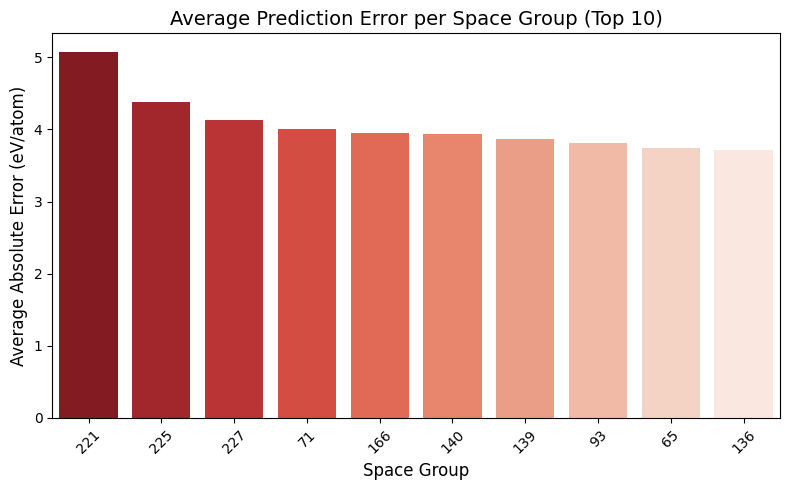

In [53]:
# ==========================================================
# 🔹 Average Absolute Error per Space Group (Top N)
# ==========================================================
# Compute average error per space group
avg_error_per_sg = df_worst.groupby('number')['error_abs'].mean().sort_values(ascending=False)

# Keep top 10 space groups by average error
avg_error_per_sg_top10 = avg_error_per_sg.head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_error_per_sg_top10.index.astype(str), y=avg_error_per_sg_top10.values, palette='Reds_r')
plt.xlabel('Space Group', fontsize=12)
plt.ylabel('Average Absolute Error (eV/atom)', fontsize=12)
plt.title('Average Prediction Error per Space Group (Top 10)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Zyra\AppData\Local\Temp\ipykernel_13480\185680080.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


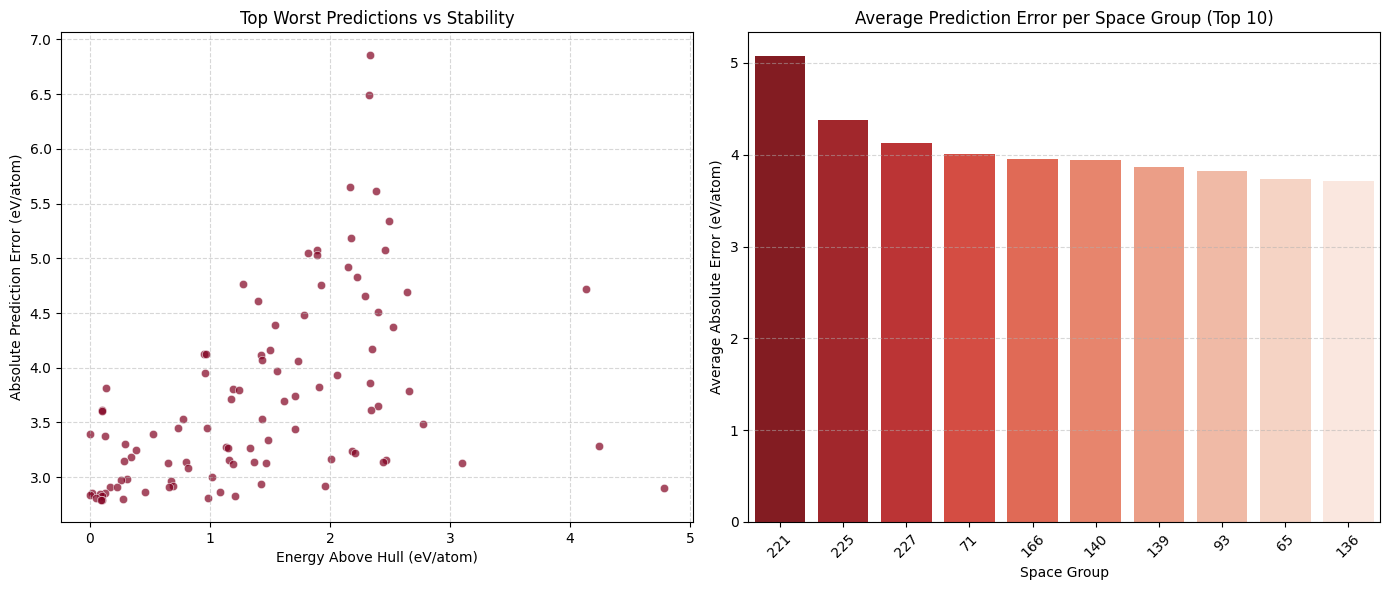

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# 1️⃣ Compute average error per space group for top 10
# ==========================================================
avg_error_per_sg = df_worst.groupby('number')['error_abs'].mean().sort_values(ascending=False)
avg_error_per_sg_top10 = avg_error_per_sg.head(10)

# ==========================================================
# 2️⃣ Create combined figure
# ==========================================================
plt.figure(figsize=(14,6))

# ----- Left subplot: Scatter plot vs energy above hull -----
plt.subplot(1, 2, 1)
sns.scatterplot(x='energy_above_hull', y='error_abs', data=df_worst, alpha=0.7, color="#800020")
plt.xlabel('Energy Above Hull (eV/atom)')
plt.ylabel('Absolute Prediction Error (eV/atom)')
plt.title('Top Worst Predictions vs Stability')
plt.grid(True, linestyle='--', alpha=0.5)

# ----- Right subplot: Bar plot of average error per space group -----
plt.subplot(1, 2, 2)
sns.barplot(
    x=avg_error_per_sg_top10.index.astype(str),
    y=avg_error_per_sg_top10.values,
    palette='Reds_r'
)
plt.xlabel('Space Group')
plt.ylabel('Average Absolute Error (eV/atom)')
plt.title('Average Prediction Error per Space Group (Top 10)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


C:\Users\Zyra\AppData\Local\Temp\ipykernel_13480\1698109382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sg_top10_count.index.astype(str), y=sg_top10_count['mean'], palette='Reds_r')


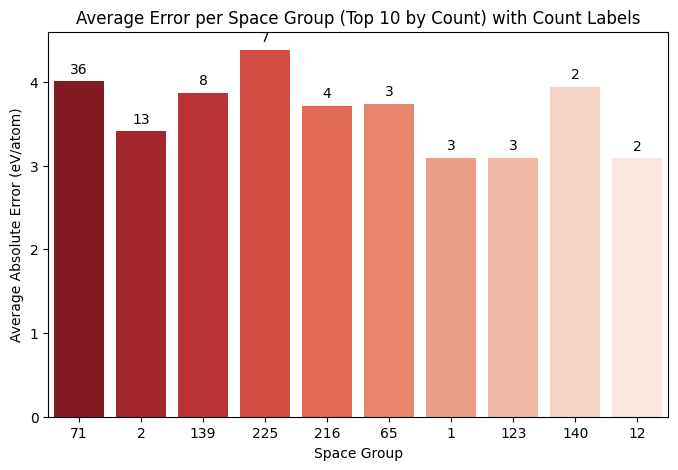

In [55]:
# Compute counts and average error
sg_summary = df_worst.groupby('number')['error_abs'].agg(['count','mean']).sort_values(by='mean', ascending=False)

# Top 10 by count
sg_top10_count = sg_summary.sort_values('count', ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=sg_top10_count.index.astype(str), y=sg_top10_count['mean'], palette='Reds_r')
for i, row in enumerate(sg_top10_count.itertuples()):
    plt.text(i, row.mean+0.1, f"{row.count}", ha='center')  # add count above bar
plt.xlabel('Space Group')
plt.ylabel('Average Absolute Error (eV/atom)')
plt.title('Average Error per Space Group (Top 10 by Count) with Count Labels')
plt.show()
